In [1]:
# change into root directory to the project
import os
os.chdir('..')

In [2]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

%load_ext autoreload
%autoreload 2

In [249]:
import pypet
import numpy as np
import collections
import deap
from deap import base
from deap import creator
from deap import tools

import matplotlib.pyplot as plt

from neurolib.models.aln import ALNModel
from neurolib.utils.parameterSpace import ParameterSpace
from neurolib.optimize.evolution import Evolution

import neurolib.optimize.evolution.evolutionaryUtils as eu

import neurolib.utils.functions as func

#import neurolib. as du

# sett dpi for notebooks on server
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['savefig.dpi'] = 600
plt.rcParams['image.cmap'] = 'plasma'

In [250]:
alnModel = ALNModel(simulateBOLD=True)
alnModel.run()

MainProcess root INFO     Model aln created


In [251]:
alnModel.outputs

{'rates': {'t': array([0.0000e+00, 1.0000e-01, 2.0000e-01, ..., 1.9998e+03, 1.9999e+03,
         2.0000e+03]),
  'rates_exc': array([[1.07421613e-07, 2.92130475e-07, 3.80031287e-07, ...,
          2.26525299e+00, 2.29553248e+00, 2.32601408e+00]]),
  'rates_inh': array([[26.2966158 , 24.92485362, 24.20512633, ...,  1.43154156,
           1.44774428,  1.46408975]])},
 'BOLD': {'t': array([0.1]), 'BOLD': array([[1.37324197e-10]])}}

In [252]:
def evaluateSimulation(traj):
    rid = traj.id
    logging.info("Running run id {}".format(rid))

    model = evolution.loadIndividual(traj)
    
    model.params['dt'] = 0.1
    model.params['duration'] = 2*1000.
        
    model.run()
    
    # -------- fitness evaluation here --------
    
    # example: get dominant frequency of activity
    frs, powers = func.getPowerSpectrum(model.rates_exc[:, -int(1000/model.params['dt']):], model.params['dt'])
    domfr = frs[np.argmax(powers)]
    
    fitness = abs(domfr - 25) # let's try to find a 25 Hz oscillation
    
    fitness_tuple = ()
    fitness_tuple += (fitness,)
    return fitness_tuple, model.outputs

In [253]:
pars = ParameterSpace(['mue_ext_mean', 'mui_ext_mean'], [[0.0, 4.0], [0.0, 4.0]])

In [254]:
evolution = Evolution(alnModel, pars, evaluateSimulation, weightList = [-1.0], POP_INIT_SIZE=50, POP_SIZE = 20, NGEN=50)

MainProcess root INFO     Storing data to: ./data/hdf/evolution.hdf
MainProcess root INFO     Trajectory Name: results-2020-01-30-16H-47M-12S
MainProcess root INFO     Number of cores: 8
MainProcess pypet.storageservice.HDF5StorageService INFO     I will use the hdf5 file `./data/hdf/evolution.hdf`.
MainProcess pypet.environment.Environment INFO     Environment initialized.
/Users/caglar/anaconda/lib/python3.7/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/Users/caglar/anaconda/lib/python3.7/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [256]:
evolution.run(verbose = False)

MainProcess root INFO     Evaluating initial population of size 50 ...
MainProcess pypet.trajectory.Trajectory INFO     Your trajectory has not been explored, yet. I will call `f_explore` instead.
MainProcess pypet.environment.Environment INFO     I am preparing the Trajectory for the experiment and initialise the store.
MainProcess pypet.environment.Environment INFO     Initialising the storage for the trajectory.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.environment.Environment INFO     
************************************************************
STARTING runs of trajectory
`results-2020-01-30-16H-47M-12S`.
************************************************************

MainProcess pypet.storageservice.HDF5StorageService INFO   

Dominant frequency: 15.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 0.0
Dominant frequency: 0.0
Dominant frequency: 1.0
Dominant frequency: 1.0


MainProcess pypet INFO     PROGRESS: Finished  3/50 runs [=                   ]  6.0%, remaining: 0:00:02


Dominant frequency: 1.0


MainProcess pypet INFO     PROGRESS: Finished  5/50 runs [==                  ] 10.0%, remaining: 0:00:01
MainProcess pypet INFO     PROGRESS: Finished  8/50 runs [===                 ] 16.0%, remaining: 0:00:01


Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 11.0
Dominant frequency: 1.0


MainProcess pypet INFO     PROGRESS: Finished 10/50 runs [====                ] 20.0%, remaining: 0:00:01


Dominant frequency: 1.0
Dominant frequency: 1.0


MainProcess pypet INFO     PROGRESS: Finished 13/50 runs [=====               ] 26.0%, remaining: 0:00:01
MainProcess pypet INFO     PROGRESS: Finished 15/50 runs [======              ] 30.0%, remaining: 0:00:01


Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 20.0
Dominant frequency: 0.0


MainProcess pypet INFO     PROGRESS: Finished 18/50 runs [=======             ] 36.0%, remaining: 0:00:01
MainProcess pypet INFO     PROGRESS: Finished 20/50 runs [========            ] 40.0%, remaining: 0:00:00
MainProcess pypet INFO     PROGRESS: Finished 23/50 runs [=========           ] 46.0%, remaining: 0:00:00


Dominant frequency: 1.0


MainProcess pypet INFO     PROGRESS: Finished 25/50 runs [==========          ] 50.0%, remaining: 0:00:00


Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 0.0
Dominant frequency: 1.0
Dominant frequency: 1.0


MainProcess pypet INFO     PROGRESS: Finished 28/50 runs [===========         ] 56.0%, remaining: 0:00:00
MainProcess pypet INFO     PROGRESS: Finished 30/50 runs [============        ] 60.0%, remaining: 0:00:00


Dominant frequency: 1.0
Dominant frequency: 0.0
Dominant frequency: 1.0


MainProcess pypet INFO     PROGRESS: Finished 33/50 runs [=============       ] 66.0%, remaining: 0:00:00


Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 1.0


MainProcess pypet INFO     PROGRESS: Finished 35/50 runs [==============      ] 70.0%, remaining: 0:00:00


Dominant frequency: 0.0
Dominant frequency: 0.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 1.0


MainProcess pypet INFO     PROGRESS: Finished 38/50 runs [===============     ] 76.0%, remaining: 0:00:00
MainProcess pypet INFO     PROGRESS: Finished 40/50 runs [================    ] 80.0%, remaining: 0:00:00


Dominant frequency: 1.0
Dominant frequency: 1.0


MainProcess pypet INFO     PROGRESS: Finished 43/50 runs [=================   ] 86.0%, remaining: 0:00:00


Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 1.0


MainProcess pypet INFO     PROGRESS: Finished 45/50 runs [==================  ] 90.0%, remaining: 0:00:00


Dominant frequency: 1.0
Dominant frequency: 1.0


MainProcess pypet INFO     PROGRESS: Finished 48/50 runs [=================== ] 96.0%, remaining: 0:00:00


Dominant frequency: 1.0
Dominant frequency: 1.0


MainProcess pypet INFO     PROGRESS: Finished 50/50 runs [====================]100.0%
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue will no longer accept new data. Hang in there for a little while. There still might be some data in the queue that needs to be stored.
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue has joined.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.environment.Environment INFO     
************************************************************
FINISHED all runs of trajectory
`results-2020-01-30-16H-47M-12S`.
************************************************************

MainProcess pypet.environment.Environment INFO     All runs of trajectory `results-2020-01-30

Dominant frequency: 17.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 1.0


MainProcess pypet INFO     PROGRESS: Finished 53/70 runs [===============     ] 75.7%, remaining: 0:00:00


Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 1.0


MainProcess pypet INFO     PROGRESS: Finished 56/70 runs [================    ] 80.0%, remaining: 0:00:00


Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 0.0
Dominant frequency: 0.0
Dominant frequency: 1.0
Dominant frequency: 0.0
Dominant frequency: 1.0


MainProcess pypet INFO     PROGRESS: Finished 60/70 runs [=================   ] 85.7%, remaining: 0:00:00


Dominant frequency: 15.0


MainProcess pypet INFO     PROGRESS: Finished 63/70 runs [==================  ] 90.0%, remaining: 0:00:00


Dominant frequency: 0.0


MainProcess pypet INFO     PROGRESS: Finished 67/70 runs [=================== ] 95.7%, remaining: 0:00:00


Dominant frequency: 0.0
Dominant frequency: 1.0
Dominant frequency: 1.0


MainProcess pypet INFO     PROGRESS: Finished 70/70 runs [====================]100.0%
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue will no longer accept new data. Hang in there for a little while. There still might be some data in the queue that needs to be stored.
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue has joined.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.environment.Environment INFO     
************************************************************
FINISHED all runs of trajectory
`results-2020-01-30-16H-47M-12S`.
************************************************************

MainProcess pypet.environment.Environment INFO     All runs of trajectory `results-2020-01-30

Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 0.0
Dominant frequency: 1.0


MainProcess pypet INFO     PROGRESS: Finished 72/90 runs [================    ] 80.0%, remaining: 0:00:04


Dominant frequency: 18.0


MainProcess pypet INFO     PROGRESS: Finished 77/90 runs [=================   ] 85.6%, remaining: 0:00:01


Dominant frequency: 0.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 0.0


MainProcess pypet INFO     PROGRESS: Finished 81/90 runs [==================  ] 90.0%, remaining: 0:00:00


Dominant frequency: 1.0
Dominant frequency: 0.0


MainProcess pypet INFO     PROGRESS: Finished 86/90 runs [=================== ] 95.6%, remaining: 0:00:00


Dominant frequency: 19.0
Dominant frequency: 26.0
Dominant frequency: 1.0
Dominant frequency: 0.0


MainProcess pypet INFO     PROGRESS: Finished 90/90 runs [====================]100.0%
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue will no longer accept new data. Hang in there for a little while. There still might be some data in the queue that needs to be stored.
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue has joined.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.environment.Environment INFO     
************************************************************
FINISHED all runs of trajectory
`results-2020-01-30-16H-47M-12S`.
************************************************************

MainProcess pypet.environment.Environment INFO     All runs of trajectory `results-2020-01-30

Dominant frequency: 19.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 13.0


MainProcess pypet INFO     PROGRESS: Finished 94/110 runs [=================   ] 85.5%, remaining: 0:00:01


Dominant frequency: 1.0
Dominant frequency: 20.0
Dominant frequency: 19.0


MainProcess pypet INFO     PROGRESS: Finished 99/110 runs [==================  ] 90.0%, remaining: 0:00:00


Dominant frequency: 18.0
Dominant frequency: 1.0
Dominant frequency: 25.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 21.0


MainProcess pypet INFO     PROGRESS: Finished 105/110 runs [=================== ] 95.5%, remaining: 0:00:00


Dominant frequency: 1.0
Dominant frequency: 17.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 1.0


MainProcess pypet INFO     PROGRESS: Finished 110/110 runs [====================]100.0%
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue will no longer accept new data. Hang in there for a little while. There still might be some data in the queue that needs to be stored.
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue has joined.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.environment.Environment INFO     
************************************************************
FINISHED all runs of trajectory
`results-2020-01-30-16H-47M-12S`.
************************************************************

MainProcess pypet.environment.Environment INFO     All runs of trajectory `results-2020-01-

Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 0.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 14.0
Dominant frequency: 14.0


MainProcess pypet INFO     PROGRESS: Finished 111/130 runs [=================   ] 85.4%, remaining: 0:00:03
MainProcess pypet INFO     PROGRESS: Finished 117/130 runs [==================  ] 90.0%, remaining: 0:00:00


Dominant frequency: 0.0
Dominant frequency: 1.0
Dominant frequency: 0.0
Dominant frequency: 0.0
Dominant frequency: 1.0
Dominant frequency: 1.0


MainProcess pypet INFO     PROGRESS: Finished 124/130 runs [=================== ] 95.4%, remaining: 0:00:00


Dominant frequency: 17.0
Dominant frequency: 0.0
Dominant frequency: 0.0
Dominant frequency: 1.0
Dominant frequency: 19.0
Dominant frequency: 19.0


MainProcess pypet INFO     PROGRESS: Finished 130/130 runs [====================]100.0%
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue will no longer accept new data. Hang in there for a little while. There still might be some data in the queue that needs to be stored.
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue has joined.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.environment.Environment INFO     
************************************************************
FINISHED all runs of trajectory
`results-2020-01-30-16H-47M-12S`.
************************************************************

MainProcess pypet.environment.Environment INFO     All runs of trajectory `results-2020-01-

Dominant frequency: 1.0
Dominant frequency: 19.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 1.0


MainProcess pypet INFO     PROGRESS: Finished 135/150 runs [==================  ] 90.0%, remaining: 0:00:00


Dominant frequency: 1.0
Dominant frequency: 20.0
Dominant frequency: 0.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 20.0
Dominant frequency: 1.0
Dominant frequency: 0.0
Dominant frequency: 1.0


MainProcess pypet INFO     PROGRESS: Finished 143/150 runs [=================== ] 95.3%, remaining: 0:00:00


Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 19.0
Dominant frequency: 1.0


MainProcess pypet INFO     PROGRESS: Finished 150/150 runs [====================]100.0%
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue will no longer accept new data. Hang in there for a little while. There still might be some data in the queue that needs to be stored.
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue has joined.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.environment.Environment INFO     
************************************************************
FINISHED all runs of trajectory
`results-2020-01-30-16H-47M-12S`.
************************************************************

MainProcess pypet.environment.Environment INFO     All runs of trajectory `results-2020-01-

Dominant frequency: 0.0
Dominant frequency: 0.0
Dominant frequency: 1.0
Dominant frequency: 1.0


MainProcess pypet INFO     PROGRESS: Finished 153/170 runs [==================  ] 90.0%, remaining: 0:00:01


Dominant frequency: 1.0
Dominant frequency: 20.0
Dominant frequency: 18.0
Dominant frequency: 1.0
Dominant frequency: 0.0
Dominant frequency: 1.0
Dominant frequency: 19.0
Dominant frequency: 0.0
Dominant frequency: 1.0
Dominant frequency: 15.0
Dominant frequency: 1.0
Dominant frequency: 0.0


MainProcess pypet INFO     PROGRESS: Finished 162/170 runs [=================== ] 95.3%, remaining: 0:00:00


Dominant frequency: 19.0
Dominant frequency: 20.0
Dominant frequency: 1.0
Dominant frequency: 1.0


MainProcess pypet INFO     PROGRESS: Finished 170/170 runs [====================]100.0%
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue will no longer accept new data. Hang in there for a little while. There still might be some data in the queue that needs to be stored.
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue has joined.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.environment.Environment INFO     
************************************************************
FINISHED all runs of trajectory
`results-2020-01-30-16H-47M-12S`.
************************************************************

MainProcess pypet.environment.Environment INFO     All runs of trajectory `results-2020-01-

Dominant frequency: 18.0
Dominant frequency: 0.0
Dominant frequency: 1.0


MainProcess pypet INFO     PROGRESS: Finished 171/190 runs [==================  ] 90.0%, remaining: 0:00:04


Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 18.0
Dominant frequency: 1.0
Dominant frequency: 0.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 19.0


MainProcess pypet INFO     PROGRESS: Finished 181/190 runs [=================== ] 95.3%, remaining: 0:00:00


Dominant frequency: 22.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 0.0


MainProcess pypet INFO     PROGRESS: Finished 190/190 runs [====================]100.0%
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue will no longer accept new data. Hang in there for a little while. There still might be some data in the queue that needs to be stored.
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue has joined.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.environment.Environment INFO     
************************************************************
FINISHED all runs of trajectory
`results-2020-01-30-16H-47M-12S`.
************************************************************

MainProcess pypet.environment.Environment INFO     All runs of trajectory `results-2020-01-

Dominant frequency: 18.0
Dominant frequency: 20.0
Dominant frequency: 1.0
Dominant frequency: 18.0
Dominant frequency: 21.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 19.0
Dominant frequency: 25.0
Dominant frequency: 14.0
Dominant frequency: 20.0
Dominant frequency: 1.0
Dominant frequency: 0.0
Dominant frequency: 1.0


MainProcess pypet INFO     PROGRESS: Finished 200/210 runs [=================== ] 95.2%, remaining: 0:00:00


Dominant frequency: 1.0
Dominant frequency: 21.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 26.0
Dominant frequency: 20.0


MainProcess pypet INFO     PROGRESS: Finished 210/210 runs [====================]100.0%
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue will no longer accept new data. Hang in there for a little while. There still might be some data in the queue that needs to be stored.
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue has joined.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.environment.Environment INFO     
************************************************************
FINISHED all runs of trajectory
`results-2020-01-30-16H-47M-12S`.
************************************************************

MainProcess pypet.environment.Environment INFO     All runs of trajectory `results-2020-01-

Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 0.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 19.0
Dominant frequency: 1.0
Dominant frequency: 0.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 19.0
Dominant frequency: 0.0


MainProcess pypet INFO     PROGRESS: Finished 219/230 runs [=================== ] 95.2%, remaining: 0:00:00


Dominant frequency: 1.0
Dominant frequency: 20.0
Dominant frequency: 20.0
Dominant frequency: 0.0


MainProcess pypet INFO     PROGRESS: Finished 230/230 runs [====================]100.0%
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue will no longer accept new data. Hang in there for a little while. There still might be some data in the queue that needs to be stored.
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue has joined.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.environment.Environment INFO     
************************************************************
FINISHED all runs of trajectory
`results-2020-01-30-16H-47M-12S`.
************************************************************

MainProcess pypet.environment.Environment INFO     All runs of trajectory `results-2020-01-

Dominant frequency: 0.0
Dominant frequency: 19.0
Dominant frequency: 20.0
Dominant frequency: 20.0
Dominant frequency: 25.0
Dominant frequency: 20.0
Dominant frequency: 1.0
Dominant frequency: 1.0


MainProcess pypet INFO     PROGRESS: Finished 238/250 runs [=================== ] 95.2%, remaining: 0:00:00


Dominant frequency: 1.0
Dominant frequency: 20.0
Dominant frequency: 1.0
Dominant frequency: 19.0
Dominant frequency: 25.0
Dominant frequency: 1.0
Dominant frequency: 0.0
Dominant frequency: 0.0
Dominant frequency: 18.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 20.0


MainProcess pypet INFO     PROGRESS: Finished 250/250 runs [====================]100.0%
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue will no longer accept new data. Hang in there for a little while. There still might be some data in the queue that needs to be stored.
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue has joined.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.environment.Environment INFO     
************************************************************
FINISHED all runs of trajectory
`results-2020-01-30-16H-47M-12S`.
************************************************************

MainProcess pypet.environment.Environment INFO     All runs of trajectory `results-2020-01-

Dominant frequency: 1.0
Dominant frequency: 21.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 26.0
Dominant frequency: 1.0
Dominant frequency: 1.0


MainProcess pypet INFO     PROGRESS: Finished 257/270 runs [=================== ] 95.2%, remaining: 0:00:00


Dominant frequency: 0.0
Dominant frequency: 0.0
Dominant frequency: 1.0
Dominant frequency: 0.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 0.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 0.0
Dominant frequency: 24.0
Dominant frequency: 1.0
Dominant frequency: 23.0


MainProcess pypet INFO     PROGRESS: Finished 270/270 runs [====================]100.0%
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue will no longer accept new data. Hang in there for a little while. There still might be some data in the queue that needs to be stored.
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue has joined.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.environment.Environment INFO     
************************************************************
FINISHED all runs of trajectory
`results-2020-01-30-16H-47M-12S`.
************************************************************

MainProcess pypet.environment.Environment INFO     All runs of trajectory `results-2020-01-

Dominant frequency: 18.0
Dominant frequency: 1.0
Dominant frequency: 18.0
Dominant frequency: 1.0
Dominant frequency: 20.0
Dominant frequency: 19.0


MainProcess pypet INFO     PROGRESS: Finished 276/290 runs [=================== ] 95.2%, remaining: 0:00:00


Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 13.0
Dominant frequency: 26.0
Dominant frequency: 20.0
Dominant frequency: 1.0
Dominant frequency: 0.0
Dominant frequency: 0.0
Dominant frequency: 22.0
Dominant frequency: 27.0


MainProcess pypet INFO     PROGRESS: Finished 290/290 runs [====================]100.0%
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue will no longer accept new data. Hang in there for a little while. There still might be some data in the queue that needs to be stored.
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue has joined.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.environment.Environment INFO     
************************************************************
FINISHED all runs of trajectory
`results-2020-01-30-16H-47M-12S`.
************************************************************

MainProcess pypet.environment.Environment INFO     All runs of trajectory `results-2020-01-

Dominant frequency: 18.0
Dominant frequency: 0.0
Dominant frequency: 1.0
Dominant frequency: 21.0
Dominant frequency: 1.0
Dominant frequency: 16.0


MainProcess pypet INFO     PROGRESS: Finished 295/310 runs [=================== ] 95.2%, remaining: 0:00:00


Dominant frequency: 1.0
Dominant frequency: 0.0
Dominant frequency: 23.0
Dominant frequency: 1.0
Dominant frequency: 21.0
Dominant frequency: 1.0
Dominant frequency: 21.0
Dominant frequency: 21.0
Dominant frequency: 23.0
Dominant frequency: 21.0
Dominant frequency: 1.0
Dominant frequency: 21.0
Dominant frequency: 1.0
Dominant frequency: 0.0


MainProcess pypet INFO     PROGRESS: Finished 310/310 runs [====================]100.0%
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue will no longer accept new data. Hang in there for a little while. There still might be some data in the queue that needs to be stored.
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue has joined.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.environment.Environment INFO     
************************************************************
FINISHED all runs of trajectory
`results-2020-01-30-16H-47M-12S`.
************************************************************

MainProcess pypet.environment.Environment INFO     All runs of trajectory `results-2020-01-

Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 0.0
Dominant frequency: 1.0
Dominant frequency: 26.0


MainProcess pypet INFO     PROGRESS: Finished 314/330 runs [=================== ] 95.2%, remaining: 0:00:01


Dominant frequency: 1.0
Dominant frequency: 0.0
Dominant frequency: 1.0
Dominant frequency: 25.0
Dominant frequency: 21.0
Dominant frequency: 22.0
Dominant frequency: 25.0
Dominant frequency: 1.0
Dominant frequency: 21.0
Dominant frequency: 1.0
Dominant frequency: 24.0
Dominant frequency: 1.0


MainProcess pypet INFO     PROGRESS: Finished 330/330 runs [====================]100.0%
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue will no longer accept new data. Hang in there for a little while. There still might be some data in the queue that needs to be stored.
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue has joined.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.environment.Environment INFO     
************************************************************
FINISHED all runs of trajectory
`results-2020-01-30-16H-47M-12S`.
************************************************************

MainProcess pypet.environment.Environment INFO     All runs of trajectory `results-2020-01-

Dominant frequency: 23.0
Dominant frequency: 1.0
Dominant frequency: 20.0
Dominant frequency: 27.0
Dominant frequency: 23.0
Dominant frequency: 19.0
Dominant frequency: 1.0
Dominant frequency: 25.0


MainProcess pypet INFO     PROGRESS: Finished 333/350 runs [=================== ] 95.1%, remaining: 0:00:01


Dominant frequency: 20.0
Dominant frequency: 21.0
Dominant frequency: 23.0
Dominant frequency: 24.0
Dominant frequency: 17.0
Dominant frequency: 21.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 24.0
Dominant frequency: 22.0
Dominant frequency: 18.0
Dominant frequency: 1.0


MainProcess pypet INFO     PROGRESS: Finished 350/350 runs [====================]100.0%
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue will no longer accept new data. Hang in there for a little while. There still might be some data in the queue that needs to be stored.
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue has joined.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.environment.Environment INFO     
************************************************************
FINISHED all runs of trajectory
`results-2020-01-30-16H-47M-12S`.
************************************************************

MainProcess pypet.environment.Environment INFO     All runs of trajectory `results-2020-01-

Dominant frequency: 1.0
Dominant frequency: 25.0
Dominant frequency: 1.0


MainProcess pypet INFO     PROGRESS: Finished 352/370 runs [=================== ] 95.1%, remaining: 0:00:02


Dominant frequency: 19.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 0.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 0.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 27.0
Dominant frequency: 21.0
Dominant frequency: 19.0
Dominant frequency: 21.0
Dominant frequency: 27.0
Dominant frequency: 20.0
Dominant frequency: 25.0
Dominant frequency: 1.0


MainProcess pypet INFO     PROGRESS: Finished 370/370 runs [====================]100.0%
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue will no longer accept new data. Hang in there for a little while. There still might be some data in the queue that needs to be stored.
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue has joined.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.environment.Environment INFO     
************************************************************
FINISHED all runs of trajectory
`results-2020-01-30-16H-47M-12S`.
************************************************************

MainProcess pypet.environment.Environment INFO     All runs of trajectory `results-2020-01-

Dominant frequency: 21.0
Dominant frequency: 24.0


MainProcess pypet INFO     PROGRESS: Finished 371/390 runs [=================== ] 95.1%, remaining: 0:00:03


Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 17.0
Dominant frequency: 26.0
Dominant frequency: 22.0
Dominant frequency: 1.0
Dominant frequency: 26.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 20.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 24.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 17.0
Dominant frequency: 24.0


MainProcess pypet INFO     PROGRESS: Finished 390/390 runs [====================]100.0%
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue will no longer accept new data. Hang in there for a little while. There still might be some data in the queue that needs to be stored.
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue has joined.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.environment.Environment INFO     
************************************************************
FINISHED all runs of trajectory
`results-2020-01-30-16H-47M-12S`.
************************************************************

MainProcess pypet.environment.Environment INFO     All runs of trajectory `results-2020-01-

Dominant frequency: 24.0
Dominant frequency: 1.0
Dominant frequency: 18.0
Dominant frequency: 23.0
Dominant frequency: 24.0
Dominant frequency: 0.0
Dominant frequency: 21.0
Dominant frequency: 24.0
Dominant frequency: 0.0
Dominant frequency: 23.0
Dominant frequency: 24.0
Dominant frequency: 24.0
Dominant frequency: 1.0
Dominant frequency: 27.0
Dominant frequency: 25.0
Dominant frequency: 24.0
Dominant frequency: 23.0
Dominant frequency: 20.0
Dominant frequency: 22.0
Dominant frequency: 1.0


MainProcess pypet INFO     PROGRESS: Finished 410/410 runs [====================]100.0%
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue will no longer accept new data. Hang in there for a little while. There still might be some data in the queue that needs to be stored.
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue has joined.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.environment.Environment INFO     
************************************************************
FINISHED all runs of trajectory
`results-2020-01-30-16H-47M-12S`.
************************************************************

MainProcess pypet.environment.Environment INFO     All runs of trajectory `results-2020-01-

Dominant frequency: 25.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 24.0
Dominant frequency: 26.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 22.0
Dominant frequency: 0.0
Dominant frequency: 1.0
Dominant frequency: 19.0
Dominant frequency: 26.0
Dominant frequency: 21.0
Dominant frequency: 21.0
Dominant frequency: 1.0
Dominant frequency: 25.0
Dominant frequency: 14.0
Dominant frequency: 20.0
Dominant frequency: 18.0
Dominant frequency: 25.0


MainProcess pypet INFO     PROGRESS: Finished 430/430 runs [====================]100.0%
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue will no longer accept new data. Hang in there for a little while. There still might be some data in the queue that needs to be stored.
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue has joined.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.environment.Environment INFO     
************************************************************
FINISHED all runs of trajectory
`results-2020-01-30-16H-47M-12S`.
************************************************************

MainProcess pypet.environment.Environment INFO     All runs of trajectory `results-2020-01-

Dominant frequency: 0.0
Dominant frequency: 1.0
Dominant frequency: 20.0
Dominant frequency: 18.0
Dominant frequency: 18.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 22.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 25.0
Dominant frequency: 24.0
Dominant frequency: 22.0
Dominant frequency: 25.0
Dominant frequency: 1.0
Dominant frequency: 19.0
Dominant frequency: 25.0
Dominant frequency: 0.0


MainProcess pypet INFO     PROGRESS: Finished 450/450 runs [====================]100.0%
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue will no longer accept new data. Hang in there for a little while. There still might be some data in the queue that needs to be stored.
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue has joined.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.environment.Environment INFO     
************************************************************
FINISHED all runs of trajectory
`results-2020-01-30-16H-47M-12S`.
************************************************************

MainProcess pypet.environment.Environment INFO     All runs of trajectory `results-2020-01-

Dominant frequency: 25.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 25.0
Dominant frequency: 20.0
Dominant frequency: 20.0
Dominant frequency: 22.0
Dominant frequency: 1.0
Dominant frequency: 0.0
Dominant frequency: 22.0
Dominant frequency: 21.0
Dominant frequency: 20.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 22.0
Dominant frequency: 20.0
Dominant frequency: 19.0
Dominant frequency: 1.0
Dominant frequency: 24.0
Dominant frequency: 1.0


MainProcess pypet INFO     PROGRESS: Finished 470/470 runs [====================]100.0%
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue will no longer accept new data. Hang in there for a little while. There still might be some data in the queue that needs to be stored.
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue has joined.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.environment.Environment INFO     
************************************************************
FINISHED all runs of trajectory
`results-2020-01-30-16H-47M-12S`.
************************************************************

MainProcess pypet.environment.Environment INFO     All runs of trajectory `results-2020-01-

Dominant frequency: 27.0
Dominant frequency: 1.0
Dominant frequency: 24.0
Dominant frequency: 24.0
Dominant frequency: 26.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 23.0
Dominant frequency: 19.0
Dominant frequency: 20.0
Dominant frequency: 22.0
Dominant frequency: 0.0
Dominant frequency: 26.0
Dominant frequency: 1.0
Dominant frequency: 20.0
Dominant frequency: 18.0
Dominant frequency: 0.0
Dominant frequency: 1.0


MainProcess pypet INFO     PROGRESS: Finished 490/490 runs [====================]100.0%
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue will no longer accept new data. Hang in there for a little while. There still might be some data in the queue that needs to be stored.
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue has joined.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.environment.Environment INFO     
************************************************************
FINISHED all runs of trajectory
`results-2020-01-30-16H-47M-12S`.
************************************************************

MainProcess pypet.environment.Environment INFO     All runs of trajectory `results-2020-01-

Dominant frequency: 25.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 21.0
Dominant frequency: 19.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 19.0
Dominant frequency: 26.0
Dominant frequency: 0.0
Dominant frequency: 1.0
Dominant frequency: 23.0
Dominant frequency: 1.0
Dominant frequency: 14.0
Dominant frequency: 23.0
Dominant frequency: 26.0
Dominant frequency: 1.0
Dominant frequency: 24.0
Dominant frequency: 1.0


MainProcess pypet INFO     PROGRESS: Finished 510/510 runs [====================]100.0%
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue will no longer accept new data. Hang in there for a little while. There still might be some data in the queue that needs to be stored.
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue has joined.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.environment.Environment INFO     
************************************************************
FINISHED all runs of trajectory
`results-2020-01-30-16H-47M-12S`.
************************************************************

MainProcess pypet.environment.Environment INFO     All runs of trajectory `results-2020-01-

Dominant frequency: 21.0
Dominant frequency: 25.0
Dominant frequency: 1.0
Dominant frequency: 22.0
Dominant frequency: 24.0
Dominant frequency: 1.0
Dominant frequency: 21.0
Dominant frequency: 26.0
Dominant frequency: 19.0
Dominant frequency: 1.0
Dominant frequency: 25.0
Dominant frequency: 21.0
Dominant frequency: 21.0
Dominant frequency: 26.0
Dominant frequency: 0.0
Dominant frequency: 1.0
Dominant frequency: 23.0
Dominant frequency: 1.0
Dominant frequency: 24.0
Dominant frequency: 24.0


MainProcess pypet INFO     PROGRESS: Finished 530/530 runs [====================]100.0%
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue will no longer accept new data. Hang in there for a little while. There still might be some data in the queue that needs to be stored.
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue has joined.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.environment.Environment INFO     
************************************************************
FINISHED all runs of trajectory
`results-2020-01-30-16H-47M-12S`.
************************************************************

MainProcess pypet.environment.Environment INFO     All runs of trajectory `results-2020-01-

Dominant frequency: 1.0
Dominant frequency: 25.0
Dominant frequency: 1.0
Dominant frequency: 21.0
Dominant frequency: 26.0
Dominant frequency: 26.0
Dominant frequency: 26.0
Dominant frequency: 24.0
Dominant frequency: 24.0
Dominant frequency: 23.0
Dominant frequency: 26.0
Dominant frequency: 25.0
Dominant frequency: 28.0
Dominant frequency: 1.0
Dominant frequency: 17.0
Dominant frequency: 27.0
Dominant frequency: 23.0
Dominant frequency: 0.0
Dominant frequency: 25.0
Dominant frequency: 25.0


MainProcess pypet INFO     PROGRESS: Finished 550/550 runs [====================]100.0%
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue will no longer accept new data. Hang in there for a little while. There still might be some data in the queue that needs to be stored.
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue has joined.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.environment.Environment INFO     
************************************************************
FINISHED all runs of trajectory
`results-2020-01-30-16H-47M-12S`.
************************************************************

MainProcess pypet.environment.Environment INFO     All runs of trajectory `results-2020-01-

Dominant frequency: 22.0
Dominant frequency: 27.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 25.0
Dominant frequency: 25.0
Dominant frequency: 23.0
Dominant frequency: 22.0
Dominant frequency: 27.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 23.0
Dominant frequency: 21.0
Dominant frequency: 26.0
Dominant frequency: 1.0
Dominant frequency: 24.0
Dominant frequency: 1.0
Dominant frequency: 23.0
Dominant frequency: 20.0


MainProcess pypet INFO     PROGRESS: Finished 570/570 runs [====================]100.0%
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue will no longer accept new data. Hang in there for a little while. There still might be some data in the queue that needs to be stored.
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue has joined.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.environment.Environment INFO     
************************************************************
FINISHED all runs of trajectory
`results-2020-01-30-16H-47M-12S`.
************************************************************

MainProcess pypet.environment.Environment INFO     All runs of trajectory `results-2020-01-

Dominant frequency: 22.0
Dominant frequency: 19.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 22.0
Dominant frequency: 20.0
Dominant frequency: 25.0
Dominant frequency: 23.0
Dominant frequency: 24.0
Dominant frequency: 23.0
Dominant frequency: 21.0
Dominant frequency: 20.0
Dominant frequency: 24.0
Dominant frequency: 1.0
Dominant frequency: 27.0
Dominant frequency: 26.0
Dominant frequency: 1.0
Dominant frequency: 20.0
Dominant frequency: 23.0
Dominant frequency: 1.0


MainProcess pypet INFO     PROGRESS: Finished 590/590 runs [====================]100.0%
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue will no longer accept new data. Hang in there for a little while. There still might be some data in the queue that needs to be stored.
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue has joined.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.environment.Environment INFO     
************************************************************
FINISHED all runs of trajectory
`results-2020-01-30-16H-47M-12S`.
************************************************************

MainProcess pypet.environment.Environment INFO     All runs of trajectory `results-2020-01-

Dominant frequency: 21.0
Dominant frequency: 1.0
Dominant frequency: 0.0
Dominant frequency: 22.0
Dominant frequency: 26.0
Dominant frequency: 1.0
Dominant frequency: 0.0
Dominant frequency: 22.0
Dominant frequency: 23.0
Dominant frequency: 1.0
Dominant frequency: 25.0
Dominant frequency: 1.0
Dominant frequency: 27.0
Dominant frequency: 14.0
Dominant frequency: 24.0
Dominant frequency: 22.0
Dominant frequency: 27.0
Dominant frequency: 23.0
Dominant frequency: 19.0
Dominant frequency: 26.0


MainProcess pypet INFO     PROGRESS: Finished 610/610 runs [====================]100.0%
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue will no longer accept new data. Hang in there for a little while. There still might be some data in the queue that needs to be stored.
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue has joined.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.environment.Environment INFO     
************************************************************
FINISHED all runs of trajectory
`results-2020-01-30-16H-47M-12S`.
************************************************************

MainProcess pypet.environment.Environment INFO     All runs of trajectory `results-2020-01-

Dominant frequency: 24.0
Dominant frequency: 14.0
Dominant frequency: 25.0
Dominant frequency: 20.0
Dominant frequency: 20.0
Dominant frequency: 1.0
Dominant frequency: 16.0
Dominant frequency: 19.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 24.0
Dominant frequency: 1.0
Dominant frequency: 24.0
Dominant frequency: 22.0
Dominant frequency: 1.0
Dominant frequency: 25.0
Dominant frequency: 1.0
Dominant frequency: 23.0
Dominant frequency: 21.0


MainProcess pypet INFO     PROGRESS: Finished 630/630 runs [====================]100.0%
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue will no longer accept new data. Hang in there for a little while. There still might be some data in the queue that needs to be stored.
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue has joined.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.environment.Environment INFO     
************************************************************
FINISHED all runs of trajectory
`results-2020-01-30-16H-47M-12S`.
************************************************************

MainProcess pypet.environment.Environment INFO     All runs of trajectory `results-2020-01-

Dominant frequency: 25.0
Dominant frequency: 19.0
Dominant frequency: 18.0
Dominant frequency: 24.0
Dominant frequency: 28.0
Dominant frequency: 1.0
Dominant frequency: 21.0
Dominant frequency: 1.0
Dominant frequency: 0.0
Dominant frequency: 24.0
Dominant frequency: 24.0
Dominant frequency: 26.0
Dominant frequency: 25.0
Dominant frequency: 27.0
Dominant frequency: 25.0
Dominant frequency: 23.0
Dominant frequency: 1.0
Dominant frequency: 15.0
Dominant frequency: 26.0
Dominant frequency: 24.0


MainProcess pypet INFO     PROGRESS: Finished 650/650 runs [====================]100.0%
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue will no longer accept new data. Hang in there for a little while. There still might be some data in the queue that needs to be stored.
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue has joined.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.environment.Environment INFO     
************************************************************
FINISHED all runs of trajectory
`results-2020-01-30-16H-47M-12S`.
************************************************************

MainProcess pypet.environment.Environment INFO     All runs of trajectory `results-2020-01-

Dominant frequency: 24.0
Dominant frequency: 19.0
Dominant frequency: 22.0
Dominant frequency: 21.0
Dominant frequency: 26.0
Dominant frequency: 25.0
Dominant frequency: 0.0
Dominant frequency: 1.0
Dominant frequency: 18.0
Dominant frequency: 18.0
Dominant frequency: 25.0
Dominant frequency: 1.0
Dominant frequency: 25.0
Dominant frequency: 24.0
Dominant frequency: 25.0
Dominant frequency: 28.0
Dominant frequency: 25.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 1.0


MainProcess pypet INFO     PROGRESS: Finished 670/670 runs [====================]100.0%
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue will no longer accept new data. Hang in there for a little while. There still might be some data in the queue that needs to be stored.
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue has joined.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.environment.Environment INFO     
************************************************************
FINISHED all runs of trajectory
`results-2020-01-30-16H-47M-12S`.
************************************************************

MainProcess pypet.environment.Environment INFO     All runs of trajectory `results-2020-01-

Dominant frequency: 22.0
Dominant frequency: 28.0
Dominant frequency: 26.0
Dominant frequency: 1.0
Dominant frequency: 24.0
Dominant frequency: 24.0
Dominant frequency: 25.0
Dominant frequency: 26.0
Dominant frequency: 1.0
Dominant frequency: 24.0
Dominant frequency: 22.0
Dominant frequency: 1.0
Dominant frequency: 21.0
Dominant frequency: 24.0
Dominant frequency: 25.0
Dominant frequency: 1.0
Dominant frequency: 25.0
Dominant frequency: 26.0
Dominant frequency: 21.0
Dominant frequency: 0.0


MainProcess pypet INFO     PROGRESS: Finished 690/690 runs [====================]100.0%
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue will no longer accept new data. Hang in there for a little while. There still might be some data in the queue that needs to be stored.
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue has joined.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.environment.Environment INFO     
************************************************************
FINISHED all runs of trajectory
`results-2020-01-30-16H-47M-12S`.
************************************************************

MainProcess pypet.environment.Environment INFO     All runs of trajectory `results-2020-01-

Dominant frequency: 24.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 23.0
Dominant frequency: 1.0
Dominant frequency: 26.0
Dominant frequency: 18.0
Dominant frequency: 24.0
Dominant frequency: 21.0
Dominant frequency: 25.0
Dominant frequency: 21.0
Dominant frequency: 25.0
Dominant frequency: 27.0
Dominant frequency: 1.0
Dominant frequency: 21.0
Dominant frequency: 1.0
Dominant frequency: 22.0
Dominant frequency: 24.0
Dominant frequency: 1.0
Dominant frequency: 25.0


MainProcess pypet INFO     PROGRESS: Finished 710/710 runs [====================]100.0%
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue will no longer accept new data. Hang in there for a little while. There still might be some data in the queue that needs to be stored.
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue has joined.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.environment.Environment INFO     
************************************************************
FINISHED all runs of trajectory
`results-2020-01-30-16H-47M-12S`.
************************************************************

MainProcess pypet.environment.Environment INFO     All runs of trajectory `results-2020-01-

Dominant frequency: 1.0
Dominant frequency: 24.0
Dominant frequency: 1.0
Dominant frequency: 22.0
Dominant frequency: 24.0
Dominant frequency: 14.0
Dominant frequency: 18.0
Dominant frequency: 25.0
Dominant frequency: 24.0
Dominant frequency: 26.0
Dominant frequency: 25.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 26.0
Dominant frequency: 1.0
Dominant frequency: 18.0
Dominant frequency: 26.0
Dominant frequency: 13.0
Dominant frequency: 25.0
Dominant frequency: 26.0


MainProcess pypet INFO     PROGRESS: Finished 730/730 runs [====================]100.0%
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue will no longer accept new data. Hang in there for a little while. There still might be some data in the queue that needs to be stored.
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue has joined.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.environment.Environment INFO     
************************************************************
FINISHED all runs of trajectory
`results-2020-01-30-16H-47M-12S`.
************************************************************

MainProcess pypet.environment.Environment INFO     All runs of trajectory `results-2020-01-

Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 22.0
Dominant frequency: 23.0
Dominant frequency: 25.0
Dominant frequency: 1.0
Dominant frequency: 24.0
Dominant frequency: 29.0
Dominant frequency: 1.0
Dominant frequency: 26.0
Dominant frequency: 20.0
Dominant frequency: 1.0
Dominant frequency: 28.0
Dominant frequency: 24.0
Dominant frequency: 26.0
Dominant frequency: 24.0
Dominant frequency: 26.0
Dominant frequency: 24.0
Dominant frequency: 1.0


MainProcess pypet INFO     PROGRESS: Finished 750/750 runs [====================]100.0%
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue will no longer accept new data. Hang in there for a little while. There still might be some data in the queue that needs to be stored.
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue has joined.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.environment.Environment INFO     
************************************************************
FINISHED all runs of trajectory
`results-2020-01-30-16H-47M-12S`.
************************************************************

MainProcess pypet.environment.Environment INFO     All runs of trajectory `results-2020-01-

Dominant frequency: 23.0
Dominant frequency: 24.0
Dominant frequency: 1.0
Dominant frequency: 15.0
Dominant frequency: 19.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 18.0
Dominant frequency: 19.0
Dominant frequency: 27.0
Dominant frequency: 1.0
Dominant frequency: 21.0
Dominant frequency: 27.0
Dominant frequency: 1.0
Dominant frequency: 28.0
Dominant frequency: 25.0
Dominant frequency: 1.0
Dominant frequency: 0.0
Dominant frequency: 27.0
Dominant frequency: 1.0


MainProcess pypet INFO     PROGRESS: Finished 770/770 runs [====================]100.0%
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue will no longer accept new data. Hang in there for a little while. There still might be some data in the queue that needs to be stored.
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue has joined.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.environment.Environment INFO     
************************************************************
FINISHED all runs of trajectory
`results-2020-01-30-16H-47M-12S`.
************************************************************

MainProcess pypet.environment.Environment INFO     All runs of trajectory `results-2020-01-

Dominant frequency: 1.0
Dominant frequency: 25.0
Dominant frequency: 24.0
Dominant frequency: 27.0
Dominant frequency: 24.0
Dominant frequency: 25.0
Dominant frequency: 1.0
Dominant frequency: 25.0
Dominant frequency: 21.0
Dominant frequency: 15.0
Dominant frequency: 23.0
Dominant frequency: 1.0
Dominant frequency: 24.0
Dominant frequency: 24.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 19.0
Dominant frequency: 1.0
Dominant frequency: 1.0


MainProcess pypet INFO     PROGRESS: Finished 790/790 runs [====================]100.0%
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue will no longer accept new data. Hang in there for a little while. There still might be some data in the queue that needs to be stored.
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue has joined.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.environment.Environment INFO     
************************************************************
FINISHED all runs of trajectory
`results-2020-01-30-16H-47M-12S`.
************************************************************

MainProcess pypet.environment.Environment INFO     All runs of trajectory `results-2020-01-

Dominant frequency: 1.0
Dominant frequency: 26.0
Dominant frequency: 23.0
Dominant frequency: 25.0
Dominant frequency: 26.0
Dominant frequency: 25.0
Dominant frequency: 23.0
Dominant frequency: 22.0
Dominant frequency: 1.0
Dominant frequency: 21.0
Dominant frequency: 1.0
Dominant frequency: 22.0
Dominant frequency: 0.0
Dominant frequency: 28.0
Dominant frequency: 0.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 24.0
Dominant frequency: 1.0
Dominant frequency: 25.0


MainProcess pypet INFO     PROGRESS: Finished 810/810 runs [====================]100.0%
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue will no longer accept new data. Hang in there for a little while. There still might be some data in the queue that needs to be stored.
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue has joined.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.environment.Environment INFO     
************************************************************
FINISHED all runs of trajectory
`results-2020-01-30-16H-47M-12S`.
************************************************************

MainProcess pypet.environment.Environment INFO     All runs of trajectory `results-2020-01-

Dominant frequency: 1.0
Dominant frequency: 20.0
Dominant frequency: 18.0
Dominant frequency: 1.0
Dominant frequency: 25.0
Dominant frequency: 19.0
Dominant frequency: 25.0
Dominant frequency: 21.0
Dominant frequency: 1.0
Dominant frequency: 25.0
Dominant frequency: 23.0
Dominant frequency: 24.0
Dominant frequency: 19.0
Dominant frequency: 15.0
Dominant frequency: 21.0
Dominant frequency: 22.0
Dominant frequency: 1.0
Dominant frequency: 24.0
Dominant frequency: 25.0
Dominant frequency: 1.0


MainProcess pypet INFO     PROGRESS: Finished 830/830 runs [====================]100.0%
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue will no longer accept new data. Hang in there for a little while. There still might be some data in the queue that needs to be stored.
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue has joined.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.environment.Environment INFO     
************************************************************
FINISHED all runs of trajectory
`results-2020-01-30-16H-47M-12S`.
************************************************************

MainProcess pypet.environment.Environment INFO     All runs of trajectory `results-2020-01-

Dominant frequency: 1.0
Dominant frequency: 24.0
Dominant frequency: 25.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 23.0
Dominant frequency: 21.0
Dominant frequency: 23.0
Dominant frequency: 0.0
Dominant frequency: 21.0
Dominant frequency: 1.0
Dominant frequency: 21.0
Dominant frequency: 19.0
Dominant frequency: 20.0
Dominant frequency: 24.0
Dominant frequency: 23.0
Dominant frequency: 23.0
Dominant frequency: 19.0
Dominant frequency: 21.0
Dominant frequency: 23.0


MainProcess pypet INFO     PROGRESS: Finished 850/850 runs [====================]100.0%
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue will no longer accept new data. Hang in there for a little while. There still might be some data in the queue that needs to be stored.
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue has joined.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.environment.Environment INFO     
************************************************************
FINISHED all runs of trajectory
`results-2020-01-30-16H-47M-12S`.
************************************************************

MainProcess pypet.environment.Environment INFO     All runs of trajectory `results-2020-01-

Dominant frequency: 26.0
Dominant frequency: 1.0
Dominant frequency: 22.0
Dominant frequency: 1.0
Dominant frequency: 19.0
Dominant frequency: 26.0
Dominant frequency: 26.0
Dominant frequency: 1.0
Dominant frequency: 26.0
Dominant frequency: 20.0
Dominant frequency: 26.0
Dominant frequency: 26.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 25.0
Dominant frequency: 1.0
Dominant frequency: 24.0
Dominant frequency: 27.0
Dominant frequency: 22.0
Dominant frequency: 23.0


MainProcess pypet INFO     PROGRESS: Finished 870/870 runs [====================]100.0%
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue will no longer accept new data. Hang in there for a little while. There still might be some data in the queue that needs to be stored.
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue has joined.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.environment.Environment INFO     
************************************************************
FINISHED all runs of trajectory
`results-2020-01-30-16H-47M-12S`.
************************************************************

MainProcess pypet.environment.Environment INFO     All runs of trajectory `results-2020-01-

Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 27.0
Dominant frequency: 18.0
Dominant frequency: 25.0
Dominant frequency: 26.0
Dominant frequency: 22.0
Dominant frequency: 1.0
Dominant frequency: 22.0
Dominant frequency: 21.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 26.0
Dominant frequency: 1.0
Dominant frequency: 25.0
Dominant frequency: 24.0
Dominant frequency: 1.0
Dominant frequency: 18.0
Dominant frequency: 26.0
Dominant frequency: 25.0


MainProcess pypet INFO     PROGRESS: Finished 890/890 runs [====================]100.0%
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue will no longer accept new data. Hang in there for a little while. There still might be some data in the queue that needs to be stored.
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue has joined.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.environment.Environment INFO     
************************************************************
FINISHED all runs of trajectory
`results-2020-01-30-16H-47M-12S`.
************************************************************

MainProcess pypet.environment.Environment INFO     All runs of trajectory `results-2020-01-

Dominant frequency: 1.0
Dominant frequency: 25.0
Dominant frequency: 27.0
Dominant frequency: 1.0
Dominant frequency: 28.0
Dominant frequency: 23.0
Dominant frequency: 25.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 25.0
Dominant frequency: 22.0
Dominant frequency: 25.0
Dominant frequency: 25.0
Dominant frequency: 24.0
Dominant frequency: 16.0
Dominant frequency: 20.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 19.0


MainProcess pypet INFO     PROGRESS: Finished 910/910 runs [====================]100.0%
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue will no longer accept new data. Hang in there for a little while. There still might be some data in the queue that needs to be stored.
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue has joined.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.environment.Environment INFO     
************************************************************
FINISHED all runs of trajectory
`results-2020-01-30-16H-47M-12S`.
************************************************************

MainProcess pypet.environment.Environment INFO     All runs of trajectory `results-2020-01-

Dominant frequency: 25.0
Dominant frequency: 0.0
Dominant frequency: 19.0
Dominant frequency: 20.0
Dominant frequency: 24.0
Dominant frequency: 25.0
Dominant frequency: 1.0
Dominant frequency: 24.0
Dominant frequency: 1.0
Dominant frequency: 25.0
Dominant frequency: 18.0
Dominant frequency: 1.0
Dominant frequency: 25.0
Dominant frequency: 27.0
Dominant frequency: 24.0
Dominant frequency: 19.0
Dominant frequency: 25.0
Dominant frequency: 17.0
Dominant frequency: 0.0
Dominant frequency: 25.0


MainProcess pypet INFO     PROGRESS: Finished 930/930 runs [====================]100.0%
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue will no longer accept new data. Hang in there for a little while. There still might be some data in the queue that needs to be stored.
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue has joined.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.environment.Environment INFO     
************************************************************
FINISHED all runs of trajectory
`results-2020-01-30-16H-47M-12S`.
************************************************************

MainProcess pypet.environment.Environment INFO     All runs of trajectory `results-2020-01-

Dominant frequency: 25.0
Dominant frequency: 0.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 21.0
Dominant frequency: 1.0
Dominant frequency: 24.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 24.0
Dominant frequency: 1.0
Dominant frequency: 25.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 23.0
Dominant frequency: 24.0
Dominant frequency: 0.0
Dominant frequency: 22.0
Dominant frequency: 1.0
Dominant frequency: 1.0


MainProcess pypet INFO     PROGRESS: Finished 950/950 runs [====================]100.0%
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue will no longer accept new data. Hang in there for a little while. There still might be some data in the queue that needs to be stored.
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue has joined.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.environment.Environment INFO     
************************************************************
FINISHED all runs of trajectory
`results-2020-01-30-16H-47M-12S`.
************************************************************

MainProcess pypet.environment.Environment INFO     All runs of trajectory `results-2020-01-

Dominant frequency: 21.0
Dominant frequency: 24.0
Dominant frequency: 15.0
Dominant frequency: 19.0
Dominant frequency: 1.0
Dominant frequency: 25.0
Dominant frequency: 22.0
Dominant frequency: 25.0
Dominant frequency: 26.0
Dominant frequency: 24.0
Dominant frequency: 25.0
Dominant frequency: 24.0
Dominant frequency: 25.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 20.0
Dominant frequency: 19.0


MainProcess pypet INFO     PROGRESS: Finished 970/970 runs [====================]100.0%
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue will no longer accept new data. Hang in there for a little while. There still might be some data in the queue that needs to be stored.
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue has joined.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.environment.Environment INFO     
************************************************************
FINISHED all runs of trajectory
`results-2020-01-30-16H-47M-12S`.
************************************************************

MainProcess pypet.environment.Environment INFO     All runs of trajectory `results-2020-01-

Dominant frequency: 1.0
Dominant frequency: 24.0
Dominant frequency: 16.0
Dominant frequency: 25.0
Dominant frequency: 0.0
Dominant frequency: 24.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 25.0
Dominant frequency: 21.0
Dominant frequency: 26.0
Dominant frequency: 25.0
Dominant frequency: 1.0
Dominant frequency: 22.0
Dominant frequency: 25.0
Dominant frequency: 27.0
Dominant frequency: 0.0
Dominant frequency: 26.0
Dominant frequency: 18.0
Dominant frequency: 1.0


MainProcess pypet INFO     PROGRESS: Finished 990/990 runs [====================]100.0%
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue will no longer accept new data. Hang in there for a little while. There still might be some data in the queue that needs to be stored.
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue has joined.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.environment.Environment INFO     
************************************************************
FINISHED all runs of trajectory
`results-2020-01-30-16H-47M-12S`.
************************************************************

MainProcess pypet.environment.Environment INFO     All runs of trajectory `results-2020-01-

Dominant frequency: 25.0
Dominant frequency: 19.0
Dominant frequency: 20.0
Dominant frequency: 25.0
Dominant frequency: 1.0
Dominant frequency: 20.0
Dominant frequency: 25.0
Dominant frequency: 25.0
Dominant frequency: 0.0
Dominant frequency: 0.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 25.0
Dominant frequency: 20.0
Dominant frequency: 1.0
Dominant frequency: 25.0
Dominant frequency: 1.0
Dominant frequency: 1.0
Dominant frequency: 24.0


MainProcess pypet INFO     PROGRESS: Finished 1010/1010 runs [====================]100.0%
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue will no longer accept new data. Hang in there for a little while. There still might be some data in the queue that needs to be stored.
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue has joined.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.environment.Environment INFO     
************************************************************
FINISHED all runs of trajectory
`results-2020-01-30-16H-47M-12S`.
************************************************************

MainProcess pypet.environment.Environment INFO     All runs of trajectory `results-2020-0

Dominant frequency: 1.0
Dominant frequency: 18.0
Dominant frequency: 1.0
Dominant frequency: 24.0
Dominant frequency: 1.0
Dominant frequency: 20.0
Dominant frequency: 1.0
Dominant frequency: 27.0
Dominant frequency: 13.0
Dominant frequency: 18.0
Dominant frequency: 25.0
Dominant frequency: 25.0
Dominant frequency: 22.0
Dominant frequency: 1.0
Dominant frequency: 25.0
Dominant frequency: 25.0
Dominant frequency: 26.0
Dominant frequency: 1.0
Dominant frequency: 26.0
Dominant frequency: 23.0


MainProcess pypet INFO     PROGRESS: Finished 1030/1030 runs [====================]100.0%
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue will no longer accept new data. Hang in there for a little while. There still might be some data in the queue that needs to be stored.
MainProcess pypet.environment.MultiprocContext INFO     The Storage Queue has joined.
MainProcess pypet.storageservice.HDF5StorageService INFO     Initialising storage or updating meta data of Trajectory `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished init or meta data update for `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.environment.Environment INFO     
************************************************************
FINISHED all runs of trajectory
`results-2020-01-30-16H-47M-12S`.
************************************************************

MainProcess pypet.environment.Environment INFO     All runs of trajectory `results-2020-0

# Analysis

Parameters dictribution (Generation 49):
mue_ext_mean: 	 mean: 1.137,	 std: 0.1429
mui_ext_mean: 	 mean: 0.23,	 std: 0.09728
There are 20 valid individuals
Mean score across population: 0.0


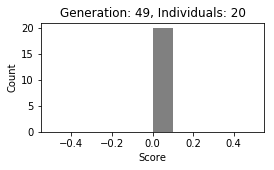

<Figure size 432x288 with 0 Axes>

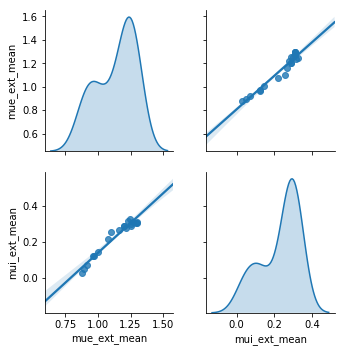

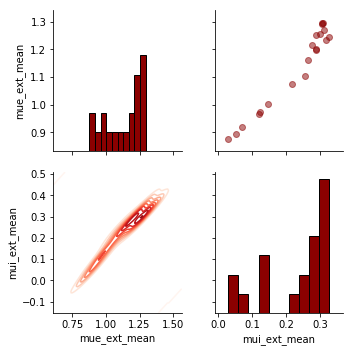

Printing 20 individuals
Individual 0 pars mue_ext_mean 1.074, mui_ext_mean 0.2172
	Fitness values:  0.0
Individual 1 pars mue_ext_mean 1.004, mui_ext_mean 0.1465
	Fitness values:  0.0
Individual 2 pars mue_ext_mean 1.201, mui_ext_mean 0.2877
	Fitness values:  0.0
Individual 3 pars mue_ext_mean 0.895, mui_ext_mean 0.05118
	Fitness values:  0.0
Individual 4 pars mue_ext_mean 1.198, mui_ext_mean 0.2895
	Fitness values:  0.0
Individual 5 pars mue_ext_mean 1.272, mui_ext_mean 0.3109
	Fitness values:  0.0
Individual 6 pars mue_ext_mean 1.294, mui_ext_mean 0.3066
	Fitness values:  0.0
Individual 7 pars mue_ext_mean 0.8764, mui_ext_mean 0.02946
	Fitness values:  0.0
Individual 8 pars mue_ext_mean 1.102, mui_ext_mean 0.2556
	Fitness values:  0.0
Individual 9 pars mue_ext_mean 1.296, mui_ext_mean 0.3075
	Fitness values:  0.0
Individual 10 pars mue_ext_mean 0.9211, mui_ext_mean 0.07011
	Fitness values:  0.0
Individual 11 pars mue_ext_mean 1.246, mui_ext_mean 0.3274
	Fitness values:  0.0
Individua

In [258]:
evolution.info()

In [265]:
# This will load results from disk in case the session is 
# started newly and the trajectory is not in memory
traj = evolution.loadResults()

MainProcess root INFO     Loading results from ./data/hdf/evolution.hdf
MainProcess root INFO     Analyzing trajectory results-2020-01-30-16H-47M-12S
MainProcess pypet.storageservice.HDF5StorageService INFO     I will use the hdf5 file `./data/hdf/evolution.hdf`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Loading trajectory `results-2020-01-30-16H-47M-12S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Loading branch `config` in mode `2`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Loading branch `derived_parameters` in mode `1`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Loading branch `parameters` in mode `2`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Loading branch `results` in mode `1`.


In [263]:
gens, all_scores = evolution.getScoresDuringEvolution()

Text(0, 0.5, 'Score')

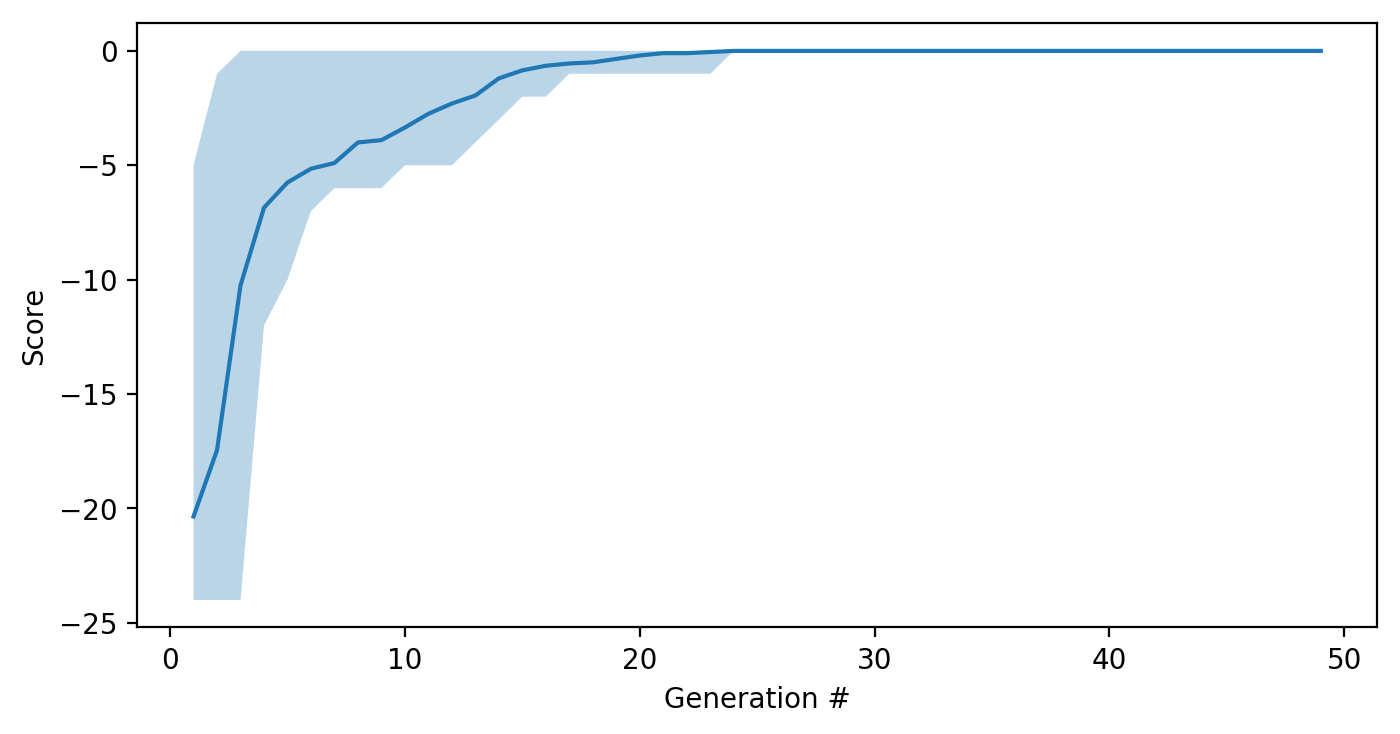

In [264]:
plt.figure(figsize=(8, 4), dpi=200)   
plt.plot(gens, np.nanmean(all_scores, axis=1))
plt.fill_between(gens, np.nanmin(all_scores, axis=1), np.nanmax(all_scores, axis=1), alpha=0.3)
plt.xlabel("Generation #")
plt.ylabel("Score")